# Cleaning US Census Data

We just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it. The person who had the job before us left all the data they had for the most recent census on multiple csv files. They didn't use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excels to make charts. The thought of it makes us shiver, this is not scalable or repeatable.

Our boss wants us to make some scatter plots and histograms by the end of the day. Can we get this data into pandas and into reasonable shape so that we can make these histograms? Let's find out !

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 

The first visualization our boss wants us to make is a scatter plot that shows average income in a state vs. proportion of women in the state. Take a look at the csv files in our folder. How are they named? What kind of information do they hold? Will they help us make this graph?

It will be easier to inspect this data once we have it in a DataFrame.We can´t even call .head() on these csv's! By using glob we will loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame. 

In [11]:
files = glob.glob("state*.csv")
state_list = []
for filename in files:
  data = pd.read_csv(filename)
  state_list.append(data)
us_census = pd.concat(state_list)
#print(us_census)

Let's look at the .columns and the .dtypes of the us_census DataFrame. Are those data types going to hinder us as we try to make histograms?   

In [12]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


Let's look at the .head of the DataFrame so that we can understand why some of these dtypes are objects instead of integers or floats. Let's start to make a plan on how to convert these columns into the right types for manipulation.   

In [13]:
print(us_census.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

Let's delete the unamed: 0 column we won't need it for the analysis 

In [14]:
del us_census["Unnamed: 0"]

We will use Regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [15]:
us_census.Income = us_census.Income.replace('[\$,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)
print(us_census.head())
print(us_census.dtypes)

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop  
0  0.03435374149659865%  43296.358603    2341093M_2489527F  
1   1.0586826347305378%  70354.743902      38416

Let's look at the GenderPop column, we are going to want to separate this into two columns, the Men column, and the Women column. Take the "M" and "F" letters out and convert the columns into a numerical type

In [16]:
us_census["GenderPop_split"] = us_census.GenderPop.str.split('_')
us_census["Men"] = us_census["GenderPop_split"].str.get(0)
us_census["Women"] = us_census["GenderPop_split"].str.get(1)
us_census.Men = us_census.Men.replace('M', '', regex=True)
us_census.Women = us_census.Women.replace('F', '', regex=True)
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
del us_census["GenderPop"]
del us_census["GenderPop_split"]
print(us_census.head())
print(us_census.dtypes)

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income       Men       Women  
0  0.03435374149659865%  43296.358603   2341093   2489527.0  
1   1.0586826347305378%  70354.743902    38416

 Now we are ready to make the graphs our boss wants us to do

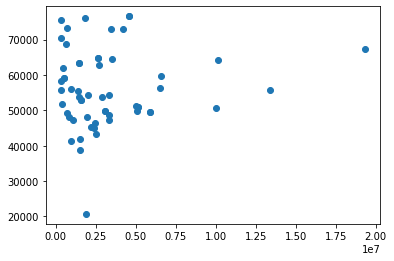

In [18]:
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

We want to double check our work. We know from experience that these monstrous csv files probably have nan values in them! Let's print out your column with the number of women per state to see.

In [19]:
print(us_census.Women)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
Name: Women, dtype: float64


We can fill in those nans by using pandas’ .fillna() function.We have the TotalPop per state, and we have the Men per state. As an estimate for the nan values in the Women column, we could use the TotalPop of that state minus the Men for that state.

We will print out the Women column after filling the nan values to see if it worked!

In [20]:
us_census = us_census.fillna(value ={
  "Women": us_census.TotalPop - us_census.Men
})
print(us_census.Women)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
Name: Women, dtype: float64


We forgot to check for duplicates in the data! Let's check if there are and drop them. 

In [22]:

print(us_census.duplicated())
us_census = us_census.drop_duplicates()
print(us_census.duplicated())

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    Fals


Le'ts make the scatterplot again. Now, it should be perfect! Our job is secure, for now.

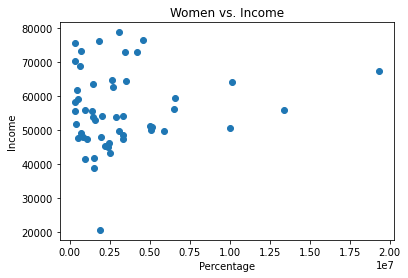

In [25]:
plt.scatter(us_census.Women, us_census.Income) 
plt.title('Women vs. Income')
plt.xlabel('Percentage')
plt.ylabel('Income')
plt.show()

Now let's make a scatterplot to see the difference between women and men vs. Income

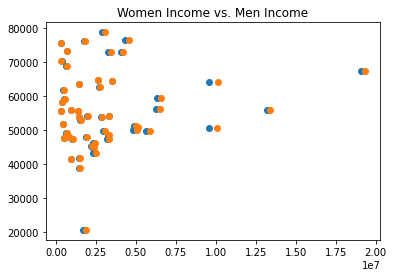

In [34]:
plt.clf()
plt.scatter(us_census.Men, us_census.Income)
plt.scatter(us_census.Women, us_census.Income)
plt.title("Women Income vs. Men Income")
plt.show()

Now, our boss wants us to make a bunch of histograms out of the race data that we have. Let's look at the .columns again to see what the race categories are.

In [26]:
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


Let's try to make a histogram for each one!

We will have to get the columns into a numerical format, and those percentage signs will have to go.

Let's not forget to fill the nan values with something that makes sense! we probably dropped the duplicate rows when making our last graph, but it would’t hurt to check for duplicates again.

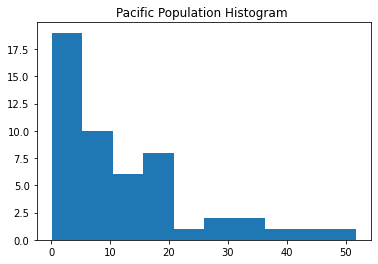

In [38]:
us_census.Hispanic = us_census.Hispanic.replace('[%]', '', regex=True)
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = us_census.White.replace('[%]', '', regex=True)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = us_census.Black.replace('[%]', '', regex=True)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = us_census.Native.replace('[%]', '', regex=True)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = us_census.Asian.replace('[%]', '', regex=True)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = us_census.Pacific.replace('[%]', '', regex=True)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census = us_census.fillna(value ={
  "Pacific": (100 - us_census.Hispanic - us_census.White - us_census.Black - us_census.Native - us_census.Asian)
})

plt.clf()
plt.hist(us_census.Hispanic)
plt.title("Hispanic Population Histogram ")
plt.show()

plt.clf()
plt.hist(us_census.Black)
plt.title("Black Population Histogram ")
plt.show()

plt.clf()
plt.hist(us_census.White)
plt.title("White Population Histogram ")
plt.show()

plt.clf()
plt.hist(us_census.Native)
plt.title("Native Population Histogram ")
plt.show()

plt.clf()
plt.hist(us_census.Asian)
plt.title("Asian Population Histogram ")
plt.show()

plt.clf()
plt.hist(us_census.Black)
plt.title("Pacific Population Histogram ")
plt.show()